In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import scipy
from sklearn import svm

In [14]:
# Setting up random points on the coordinate system

#x1
mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

#x2
mu_vec2 = np.array([1,2])
cov_mat2 = np.array([[1,0],[0,1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
mu_vec2 = mu_vec2.reshape(1,2).T

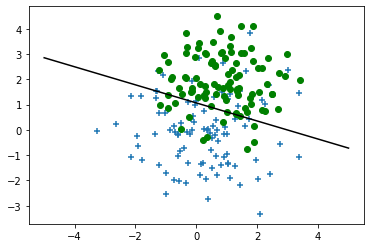

In [27]:
fig = plt.figure()

plt.scatter(x1_samples[:,0],x1_samples[:,1], marker='+')
plt.scatter(x2_samples[:,0],x2_samples[:,1], c= 'green', marker='o')

X = np.concatenate((x1_samples,x2_samples), axis = 0)
Y = np.array([0]*100 + [1]*100)

C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'linear',  gamma=0.7, C=C )
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
data =pd.read_csv('ex2data1.txt',header=None)
X = data.values[:,:2]  #(100,2)
y = data.values[:,2:3] #(100,1)

In [41]:
X.shape

(101, 2)

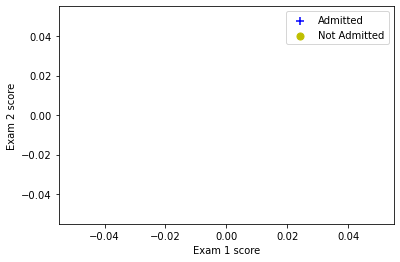

In [42]:
#%% ==================== Part 1: Plotting ====================
postive_value = data.loc[data[2] == 1]
#print(postive_value.values[:,2:3])
negative_value = data.loc[data[2] == 0]
#print(len(postive_value))
#print(len(negative_value))
ax1 = postive_value.plot(kind='scatter',x=0,y=1,s=50,color='b',marker="+",label="Admitted") # S is line width #https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter 
ax2 = negative_value.plot(kind='scatter',x=0,y=1,s=50,color='y',ax=ax1,label="Not Admitted")
ax1.set_xlabel("Exam 1 score")
ax2.set_ylabel("Exam 2 score")
plt.show()
#print(ax1 == ax2)
#print(np.shape(X))

In [43]:
#============ Part 2: Compute Cost and Gradient ===========
[m,n] = np.shape(X) #(100,2)
print(m,n)
additional_coulmn = np.ones((m,1))
X = np.append(additional_coulmn,X,axis=1)
initial_theta = np.zeros((n+1), dtype=int)
print(initial_theta)

# In4
#Sigmoid and cost function
def sigmoid(z):
    g = np.zeros(np.shape(z));
    g = 1/(1+np.exp(-z));
    return g
def costFunction(theta, X, y):
    J = 0;
    #print(theta)
    receive_theta = np.array(theta)[np.newaxis] ##This command is used to create the 1D array 
    #print(receive_theta)
    theta = np.transpose(receive_theta)
    #print(np.shape(theta))       
    #grad = np.zeros(np.shape(theta))
    z = np.dot(X,theta) # where z = theta*X
    #print(z)
    h = sigmoid(z) #formula h(x) = g(z) whether g = 1/1+e(-z) #(100,1)
    #print(np.shape(h))
    #J = np.sum(((-y)*np.log(h)-(1-y)*np.log(1-h))/m); 
    J = np.sum(np.dot((-y.T),np.log(h))-np.dot((1-y).T,np.log(1-h)))/m
    #J = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
     #error = h-y
    #print(np.shape(error))
    #print(np.shape(X))
    grad =np.dot(X.T,(h-y))/m
    #print(grad)
    return J,grad


101 2
[0 0 0]


In [44]:
J = cost()

NameError: name 'J' is not defined

In [ ]:
#In5
[cost, grad] = costFunction(initial_theta, X, y)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros): \n',grad)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')